Do this BEFORE running bash run_xray

In [27]:
import scipy.io as scio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
        data_dir = './data/XrayBaggage20/'
        #data_A = scipy.io.loadmat(data_dir+'XrayDataset-'+domainSet[sourceDomainIndex]+'-resnet101-noft.mat')
        #data_A = scipy.io.loadmat('/data/datacenter/H3C_GPU/projects/yuchen/gzsda-main/gzsda-main/data/XrayBaggage20/CRISPR.mat')
        
        data1=scio.loadmat('/data/datacenter/H3C_GPU/projects/yuchen/gzsda-main/gzsda-main/data/XrayBaggage20/XrayDataset-regu-resnet101-noft.mat')
        data2=scio.loadmat('/data/datacenter/H3C_GPU/projects/yuchen/gzsda-main/gzsda-main/data/XrayBaggage20/XrayDataset-xray-resnet101-noft.mat')
        
        
        df1 = pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/gzsda-main/gzsda-main/data/XrayBaggage20/CRISPR.csv')
        df2 = pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/gzsda-main/gzsda-main/data/XrayBaggage20/Compound.csv')
        df1=df1.iloc[:,1:]
        df2=df2.iloc[:,1:]
        df3=pd.concat([df1,df2])
        dvv=df3['Metadata_gene'].reset_index()
        labels, unique_labels = pd.factorize(df3['Metadata_gene'])
        dvv['intlab']=labels
        dvv=dvv.iloc[:,1:]
        mapping_dict = dict(zip(unique_labels, labels))
        df3['Metadata_gene']=pd.factorize(df3['Metadata_gene'])[0]
        
        df3=df3.reset_index()
        df11=df3.iloc[:5759,1:]
        df11=df11.reset_index()
        df11=df11.iloc[:,1:]
        df22=df3.iloc[5759:,1:]
        df22=df22.reset_index()
        df22=df22.iloc[:,1:]
        
        
        

        df11['Metadata_gene']=df11['Metadata_gene'].astype('int64')
        dfx=df11.iloc[:,14:]
        dfx=np.array(dfx)
        dfy=df11['Metadata_gene']
        dfy=np.array(dfy)
        dfy=dfy.reshape(1,-1)
        data1['labels']=dfy
        data1['resnet101_features']=dfx

        df22['Metadata_gene']=df22['Metadata_gene'].astype('int64')
        dfx=df22.iloc[:,14:]
        dfx=np.array(dfx)
        dfy=df22['Metadata_gene']
        dfy=np.array(dfy)
        dfy=dfy.reshape(1,-1)
        data2['labels']=dfy
        data2['resnet101_features']=dfx
        
        data_A=data1
        data_B=data2

In [33]:
dfte1a=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_seen_new.csv') #seen
dfte1a=dfte1a.iloc[:,2:-1]
dfte1a=dfte1a[dfte1a['Metadata_gene']!='empty']
dfte1a=dfte1a[dfte1a['Metadata_control_type']!='negcon']
dfte1a=dfte1a[dfte1a['Metadata_experiment_type']=='Compound']
dfte1a['unseen'] = 0
dfte2a=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_unseen_new.csv') #unseen
dfte2a=dfte2a.iloc[:,2:-1]
dfte2a=dfte2a[dfte2a['Metadata_gene']!='empty']
dfte2a=dfte2a[dfte2a['Metadata_control_type']!='negcon']
dfte2a=dfte2a[dfte2a['Metadata_experiment_type']=='Compound']
dfte2a=dfte2a.reset_index()
dfte2a=dfte2a.iloc[:,1:]
dfte2a['unseen']= 1

/tmp/ipykernel_369287/1396120575.py:1: DtypeWarning: Columns (3,7,8,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfte1a=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/MLP_seen_new.csv') #seen
/tmp/ipykernel_369287/1396120575.py:7: DtypeWarning: Columns (3,7,8,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfte2a=pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/dfte2a.csv') #unseen


In [31]:
df = pd.read_csv('/data/datacenter/H3C_GPU/projects/yuchen/gzsda-main/gzsda-main/data/XrayBaggage20/Compound.csv')
df['split']=np.nan
df['unseen']=np.nan
for i in range(len(dfte1a)):
    pla=dfte1a['Metadata_Plate'][i]
    wel=dfte1a['Metadata_Well'][i]
    for j in range(len(df)):
        pla0=df['Metadata_Plate'][j]
        wel0=df['Metadata_Well'][j]
        if pla0==pla and wel0==wel:
            #print('yes!!')
            df['split'][j]=2
            df['unseen'][j]=0
for i in range(len(dfte2a)):
    pla=dfte2a['Metadata_Plate'][i]
    wel=dfte2a['Metadata_Well'][i]
    for j in range(len(df)):
        pla0=df['Metadata_Plate'][j]
        wel0=df['Metadata_Well'][j]
        if pla0==pla and wel0==wel:
            #print('yes!!')
            df['split'][j]=2
            df['unseen'][j]=1
df['split']=df['split'].fillna(1)
df['split']=df['split'].astype(int)
df['unseen']=df['unseen'].fillna(0)
df['unseen']=df['unseen'].astype(int)
dfk=df['split']
dfk=np.array(dfk)
dfp=df['unseen']
dfp=np.array(dfp)


dataSplit=scio.loadmat(data_dir+'instanceSplit_xrayDataset_unseen10.mat')
for i in range(0,5):
    for j in range(0,2):
        dataSplit['targetDomain_splitFlag'][0][i][0][j]=dfk
        dataSplit['targetDomain_unseenClass'][0][i][0][j]=dfp
scio.savemat('dataSplit1.mat',dataSplit)

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=0
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unseen'][j]=1
/tmp/ipykernel_369287/437003926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'][j]=2
/tmp/ipykernel_369287/437003926.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

Do this after running bash run_xray

In [36]:
lab=unique_labels.tolist()
dww=dvv.drop_duplicates()
spp=scio.loadmat('/data/datacenter/H3C_GPU/projects/yuchen/gzsda-main/gzsda-main/data/XrayBaggage20/dataSplit1.mat')
spp1=spp['targetDomain_unseenClass'][0][0][0][0][0]
ccc=scio.loadmat('/data/datacenter/H3C_GPU/projects/yuchen/gzsda-main/gzsda-main/results/xray10-regu-xray-trial0-vaeEpochs-50-latSize-64lr0.001.mat')
n=10
top_indices = np.argpartition(-ccc['acc_per_class'][49], n)[:n][~np.isnan(ccc['acc_per_class'][49][np.argpartition(-ccc['acc_per_class'][49], n)[:n]])]
lst1=[]
lst2=[]
for i in top_indices:
    lst1.append(dvv[dvv['intlab']==i].iloc[0,:]['Metadata_gene'])
    lst2.append(ccc['acc_per_class'][49][i])
pd.DataFrame({'label': lst1, 'Accuracy': lst2}).sort_values(by='Accuracy',ascending=False)

,label,Accuracy
2,CSF1R,0.933333
1,GJB4,0.875000
0,HSP90AB1,0.812500
3,HCK,0.812500
7,CA5A,0.733333
4,PLA2G1B,0.687500
6,TGFBR1,0.687500
5,ALK,0.625000
8,LCK,0.625000
9,CATSPER4,0.625000


In [37]:
dr=pd.DataFrame({'Label': lab, 'Accuracy': ccc['acc_per_class'][49], 'If_seen': spp1})
dr['If_seen'] = dr['If_seen'].replace({0:'seen', 1:'unseen'})
dr=dr.dropna()
dr=dr.sort_values(by='Accuracy', ascending = False)
dr=dr.iloc[:10,:]

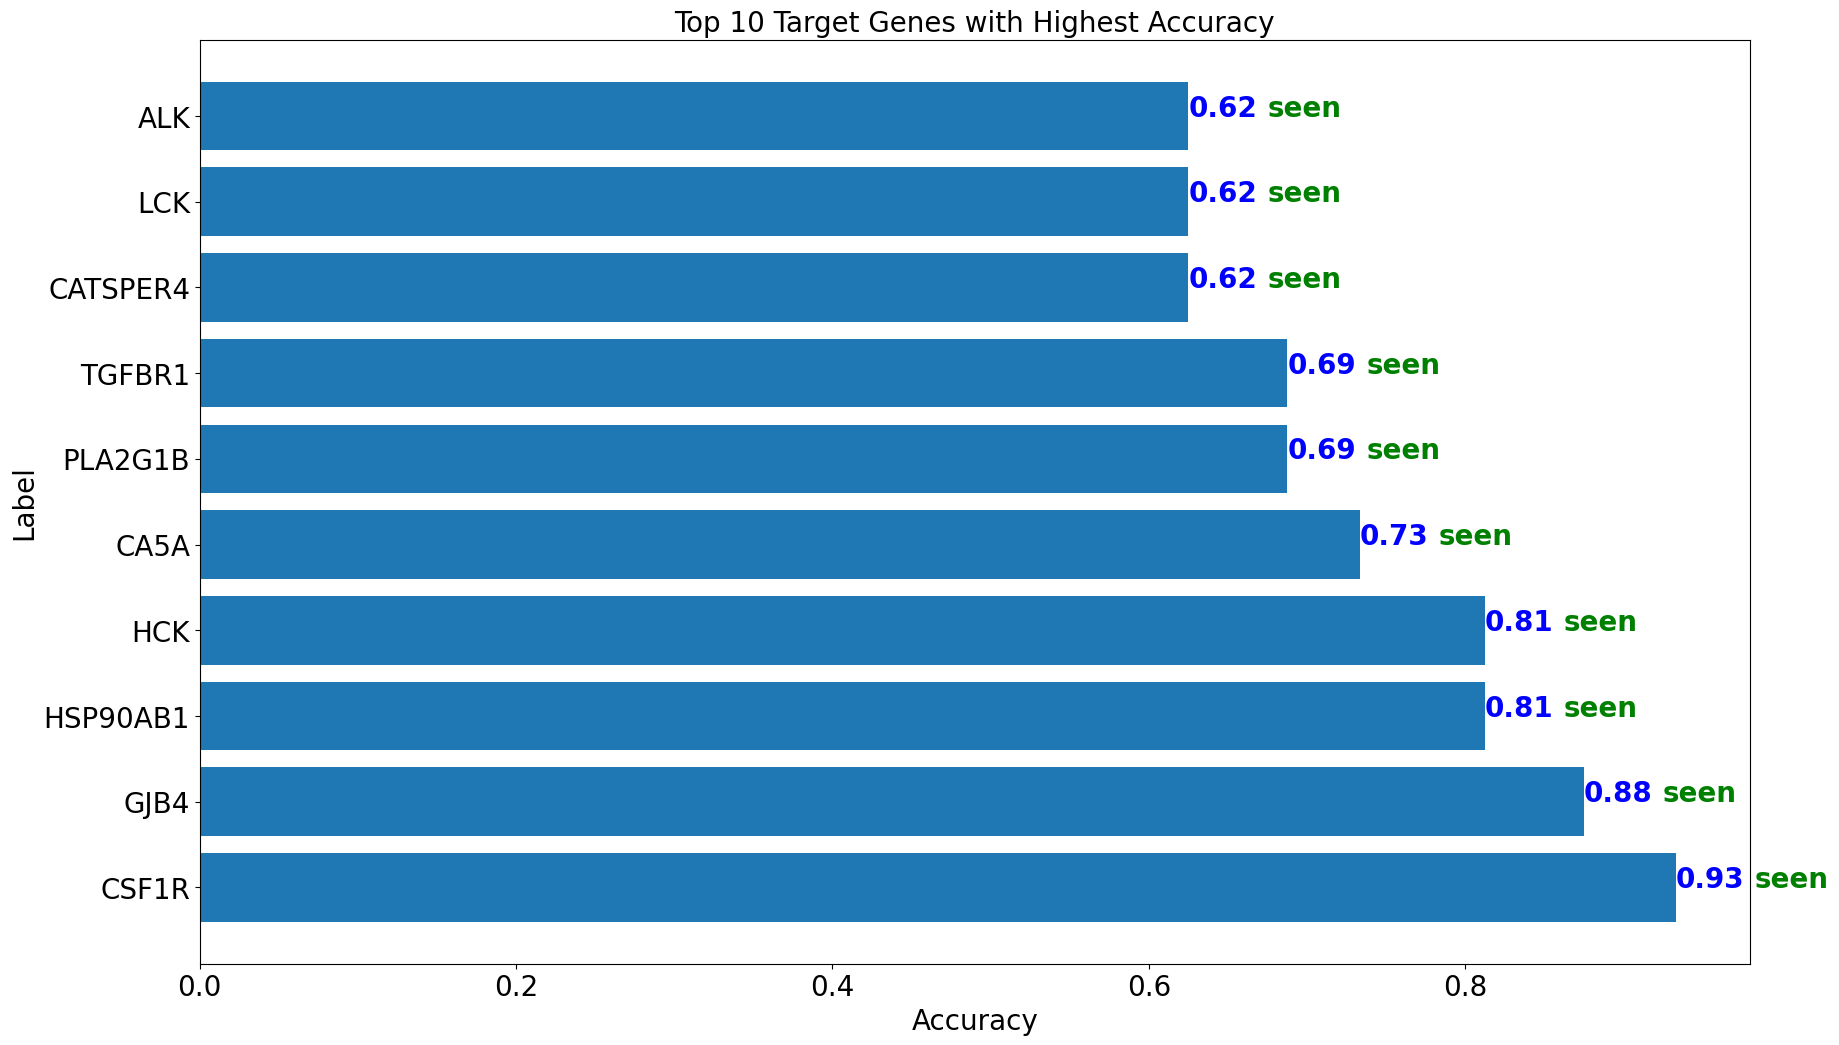

In [38]:
plt.figure(figsize=(20,12))
plt.barh(dr['Label'],dr['Accuracy'])
plt.xlabel('Accuracy',fontsize=20)
plt.ylabel('Label',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Top 10 Target Genes with Highest Accuracy',fontsize=20)
for i,(v,s) in enumerate(zip(dr['Accuracy'],dr['If_seen'])):
    plt.text(v,i,f'{v:.2f}', color = 'blue', fontweight = 'bold',fontsize=20)
    plt.text(v+0.05, i, s, color = 'green', fontweight = 'bold',fontsize=20)
plt.show()

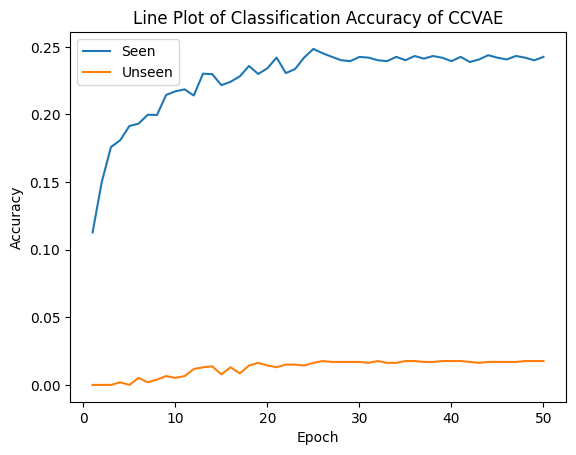

In [39]:
epochs = np.arange(1,51)
data1 = ccc['acc_seen'][0]
data2 = ccc['acc_unseen'][0]
plt.plot(epochs, data1, label='Seen')
plt.plot(epochs, data2, label='Unseen')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Line Plot of Classification Accuracy of CCVAE')
plt.legend()